In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from loadData import load

from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

In [2]:
trainData, trainLabels, testData, testLabels = load()

models = []
for i in xrange(1, 30):   
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(trainData, np.array(trainLabels).ravel())
    models.append(knn)

In [14]:
trainErrors = []
testErrors = []
trainPredictions = []
testPredictions = []

for model in models:
    predictions = model.predict(trainData)
    trainPredictions.append(predictions)
    errors = (predictions != np.array(trainLabels).ravel())
    trainErrors.append(100 * np.mean(errors))
    print "Train Error: {0:0.2f}%".format(100 * np.mean(errors))

    predictions = model.predict(testData)
    testPredictions.append(predictions)
    errors = (predictions != np.array(testLabels).ravel())
    testErrors.append(100 * np.mean(errors))
    print "Test Error: {0:0.2f}%".format(100 * np.mean(errors))

Train Error: 0.00%
Test Error: 12.15%
Train Error: 1.18%
Test Error: 13.88%
Train Error: 0.80%
Test Error: 10.93%
Train Error: 1.36%
Test Error: 10.89%
Train Error: 1.56%
Test Error: 9.84%
Train Error: 1.56%
Test Error: 9.87%
Train Error: 1.82%
Test Error: 9.67%
Train Error: 2.08%
Test Error: 9.26%
Train Error: 2.30%
Test Error: 9.47%
Train Error: 2.38%
Test Error: 9.33%
Train Error: 2.61%
Test Error: 9.54%
Train Error: 2.71%
Test Error: 9.70%
Train Error: 2.80%
Test Error: 9.37%
Train Error: 2.90%
Test Error: 9.64%
Train Error: 3.09%
Test Error: 9.57%
Train Error: 3.17%
Test Error: 9.40%
Train Error: 3.25%
Test Error: 9.47%
Train Error: 3.24%
Test Error: 9.43%
Train Error: 3.40%
Test Error: 9.40%
Train Error: 3.37%
Test Error: 9.54%
Train Error: 3.66%
Test Error: 9.54%
Train Error: 3.59%
Test Error: 9.70%
Train Error: 3.77%
Test Error: 9.60%
Train Error: 3.60%
Test Error: 9.77%
Train Error: 3.92%
Test Error: 9.74%
Train Error: 3.86%
Test Error: 9.87%
Train Error: 4.00%
Test Error: 10.

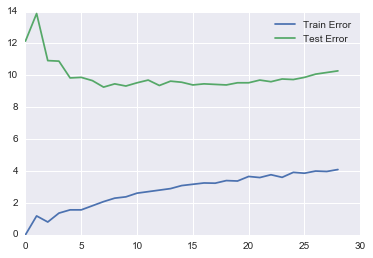

In [21]:
plt.plot(trainErrors, label="Train Error")
plt.plot(testErrors, label="Test Error")
plt.legend()

In [12]:
testErrors

0.099692264488726118

In [ ]:
validationErrors = []
for model in models:
    properLabels = np.array(trainLabels).ravel()
    scores = cross_val_score(models[0], trainData, properLabels, cv=10, scoring="accuracy")
    validationErrors.append((1 - scores.mean()) * 100)